In [1]:
# Import required libraries
import json
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import logging
import sys
import os

from importlib import reload
import src.analysis.topic as topic
reload(topic)

# Import all functions from the topic module
from src.analysis.topic import (
    read_json_in_chunks_with_ids,
    parse_topic_file,
    update_comments_with_clusters,
    analyze_cluster_distribution,
    analyze_user_clusters,
    calculate_user_sentiment_ratios,
    load_and_process_data,
    search_comments,
    display_search_results,
    read_comment_topic_clusters
)

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [2]:
# First, define your file paths
JSON_FILE = Path('2025.04.05 ToPeraicaLiska/commentedPool.json')
TOPICS_FILE = Path('2025TrollDetection/Topics/topicClusterText_EVOC_Art_ChT_KeyBERT_0.txt')

# Use the load_and_process_data function to load and process everything
articles_df, comments_df = load_and_process_data(
    json_file_path=JSON_FILE,
    topic_file_path=TOPICS_FILE,
    max_entries=200000  # Adjust as needed
)

# Now you can run the analyze_cluster_distribution function
cluster_stats = analyze_cluster_distribution(comments_df)

# Display the statistics
total_comments = cluster_stats['total_comments']

print(f"\nCluster Assignment Statistics:")
print(f"Total comments: {total_comments}")
print(f"All comments have been assigned to clusters (including Unlabelled)")

Reading JSON file: 15517824it [00:08, 1803267.64it/s]
INFO:src.analysis.topic:Total number of articles: 10610
INFO:src.analysis.topic:Total number of comments: 348047



Cluster Assignment Statistics:
Total comments: 348047
All comments have been assigned to clusters (including Unlabelled)


In [4]:
comments_df.at[3365, 'content']

'To je něco pro pro "lepšolidi" a nuteláčkovi poskoky. Však ale jinak ať si jdou pokud to Rusko mají tak rádi. Já nepatřím ani k jedné bandě šašků. Já nevidím co se týče politických názorů jen černou a bílou.'

In [7]:
# Find article with specific title
target_title = "Již 78 dní oproti původnímu plánu jsou dva astronauti..."
matching_article = articles_df[articles_df['title'] == target_title]

if not matching_article.empty:
    print("\nFound matching article:")
    print(matching_article)
else:
    print("\nNo article found with that title")



Found matching article:
        docId        docCode  docType author          publishDate  \
60  412203922  _SM0066886627  Article         2024-08-31T22:57:00   

                                                  url  \
60  https://www.novinky.cz/clanek/zahranicni-foto-...   

                                                title  \
60  Již 78 dní oproti původnímu plánu jsou dva ast...   

                                              content  \
60  Již 78 dní oproti původnímu plánu jsou dva ast...   

                  attributes  docIdx  article_id  cluster_id  \
60  {'sentiment': 'Neutral'}    6910          60           0   

                cluster_label  
60  236 astronautů kosmonautů  


In [8]:
# Get comments for article_id 60 and sort by publishDate
article_60_comments = comments_df[comments_df['article_id'] == 60].sort_values('publishDate')

print(f"\nComments for article_id 60 (sorted by publish date):")
print(f"Total comments: {len(article_60_comments)}")
print("\n")

# Display each comment with timestamp and content
for _, comment in article_60_comments.iterrows():
    print(f"Time: {comment['publishDate']}")
    print(f"Author: {comment['author']}")
    print(f"Content: {comment['content']}")
    print("-" * 80)



Comments for article_id 60 (sorted by publish date):
Total comments: 50


Time: 2024-08-31T23:37:00
Author: Marek Šimon
Content: Tomu říkám přesčas :-)
--------------------------------------------------------------------------------
Time: 2024-08-31T23:40:00
Author: Koksal Petr
Content: Smutné na tom je, že se nemůžou vrátit zpět, kdyby chtěli.
--------------------------------------------------------------------------------
Time: 2024-08-31T23:40:00
Author: Oleg Pastrňák
Content: Letí, letí letadlo, Boeing, Boeing, Boeing. Bojím aby nespadlo, bojim, bojim, bojim
--------------------------------------------------------------------------------
Time: 2024-09-01T00:40:00
Author: Martin Zavadil
Content: Tal meui focením ora. Pak ana. Občas lickin.sguurt.pozor to poletí všude.Pokec s Hjistnem a fotí.e.Co dá.ek večeři?
--------------------------------------------------------------------------------
Time: 2024-09-01T00:40:00
Author: Miroslav Novotný
Content: Jestli ta prázdná loď doletí bez p

In [ ]:
# Read comment topic clusters
from src.analysis.topic import read_comment_topic_clusters

comment_topic_clusters = read_comment_topic_clusters('2025TrollDetection/CommentSentChunks/doc2cluster_EVOC_Art_ChT_KeyBERT_0_0_KeyBERT_0.json')

comment_topic_clusters.head()



Successfully loaded 6708 comments with their topic clusters


,comment_id,content,comment_cluster_id,cluster_title
0,0,Tomu říkám přesčas :-),69,dočkáme počkám
1,1,"Smutné na tom je, že se nemůžou vrátit zpět, k...",-1,Unlabelled
2,2,"Letí, letí letadlo, Boeing, Boeing, Boeing",49,letadel 747
3,3,"Bojím aby nespadlo, bojim, bojim, bojim",82,riskujeme vyděšení
4,4,Tal meui focením ora,74,říkali citace


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


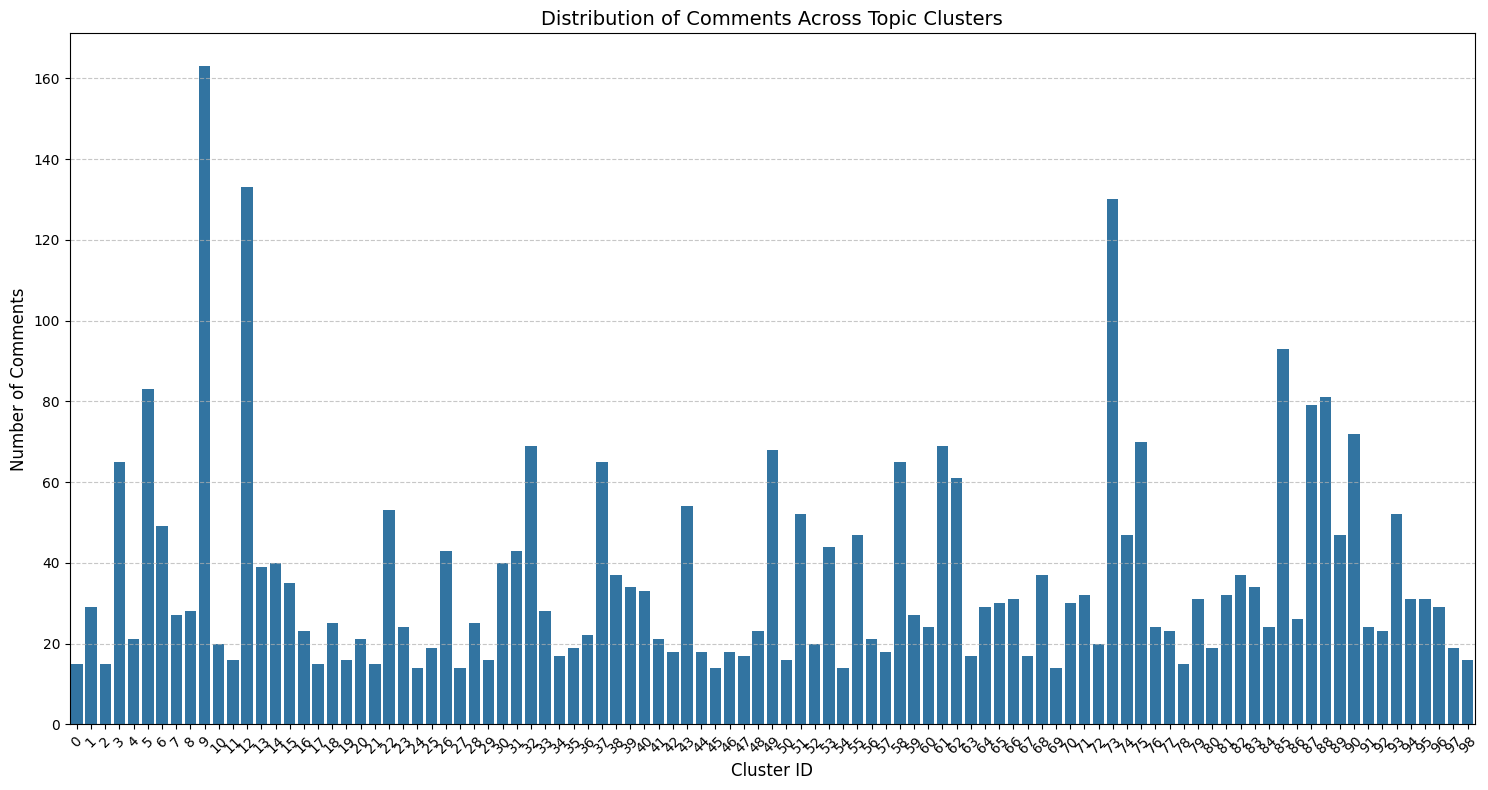


Total comments: 6708
Comments with topic clusters: 3603 (53.7%)
Unlabelled comments: 3105 (46.3%)
Number of unique topic clusters: 99

Top 10 largest clusters:
1. Cluster 9: russákům kosmonauty: 163 comments
2. Cluster 12: musk astronautovi: 133 comments
3. Cluster 73: zeměkoule plochozemců: 130 comments
4. Cluster 85: hlupáci egoismus: 93 comments
5. Cluster 5: česká čechoslováci: 83 comments
6. Cluster 88: vystupoval starliner: 81 comments
7. Cluster 87: byste blbosti: 79 comments
8. Cluster 90: těšil zahailuji: 72 comments
9. Cluster 75: úspěch byli: 70 comments
10. Cluster 61: měsíční planetky: 69 comments


In [8]:
# Create a bar plot of comment cluster frequencies
import matplotlib.pyplot as plt
import seaborn as sns

# Get value counts excluding -1 (unlabelled)
cluster_counts = comment_topic_clusters[comment_topic_clusters['comment_cluster_id'] != -1]['comment_cluster_id'].value_counts()

# Get cluster titles for top clusters
top_clusters = cluster_counts.head(10)
top_cluster_titles = []
for cluster_id in top_clusters.index:
    title = comment_topic_clusters[comment_topic_clusters['comment_cluster_id'] == cluster_id]['cluster_title'].iloc[0]
    top_cluster_titles.append(f"Cluster {cluster_id}: {title}")

# Create figure with larger size
plt.figure(figsize=(15, 8))

# Create bar plot
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)

# Customize plot
plt.title('Distribution of Comments Across Topic Clusters', fontsize=14)
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Number of Comments', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for easier reading of values
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()

# Print some statistics
total_comments = len(comment_topic_clusters)
unlabelled_comments = len(comment_topic_clusters[comment_topic_clusters['comment_cluster_id'] == -1])
labelled_comments = total_comments - unlabelled_comments

print(f"\nTotal comments: {total_comments}")
print(f"Comments with topic clusters: {labelled_comments} ({labelled_comments/total_comments*100:.1f}%)")
print(f"Unlabelled comments: {unlabelled_comments} ({unlabelled_comments/total_comments*100:.1f}%)")
print(f"Number of unique topic clusters: {len(cluster_counts)}")

print("\nTop 10 largest clusters:")
for i, (cluster_id, count) in enumerate(top_clusters.items(), 1):
    print(f"{i}. {top_cluster_titles[i-1]}: {count} comments")


In [14]:
# Get all cluster titles
print("\nAll cluster titles:")
for cluster_id in cluster_counts.index:
    title = comment_topic_clusters[comment_topic_clusters['comment_cluster_id'] == cluster_id]['cluster_title'].iloc[0]
    print(f"Cluster {cluster_id}: {title} ({cluster_counts[cluster_id]} comments)")



All cluster titles:
Cluster 9: russákům kosmonauty (163 comments)
Cluster 12: musk astronautovi (133 comments)
Cluster 73: zeměkoule plochozemců (130 comments)
Cluster 85: hlupáci egoismus (93 comments)
Cluster 5: česká čechoslováci (83 comments)
Cluster 88: vystupoval starliner (81 comments)
Cluster 87: byste blbosti (79 comments)
Cluster 90: těšil zahailuji (72 comments)
Cluster 75: úspěch byli (70 comments)
Cluster 61: měsíční planetky (69 comments)
Cluster 32: voda oceány (69 comments)
Cluster 49: letadel 747 (68 comments)
Cluster 37: stanislav hláška (65 comments)
Cluster 58: raket raketoplanu (65 comments)
Cluster 3: asteroidnímu mohl (65 comments)
Cluster 62: spacex vesmírný (61 comments)
Cluster 43: stoletím miliardami (54 comments)
Cluster 22: marťan marsu (53 comments)
Cluster 93: jaký kdo (52 comments)
Cluster 51: přistávací loď (52 comments)
Cluster 6: evropanům europarlamentu (49 comments)
Cluster 55: crew9 astronautů (47 comments)
Cluster 89: nemalujem kriminál (47 comme

In [4]:
from src.models.predictor import TrollPredictor

model_path = "./checkpoints/finetuned_model.pt"

# Initialize predictor with threshold
predictor = TrollPredictor(
    model_path=model_path,
    comments_per_user=10,
    max_length=96,
    threshold=0.5  # Add threshold parameter
)

INFO:datasets:PyTorch version 2.6.0 available.
INFO:src.models.predictor:Loaded model weights from ./checkpoints/finetuned_model.pt


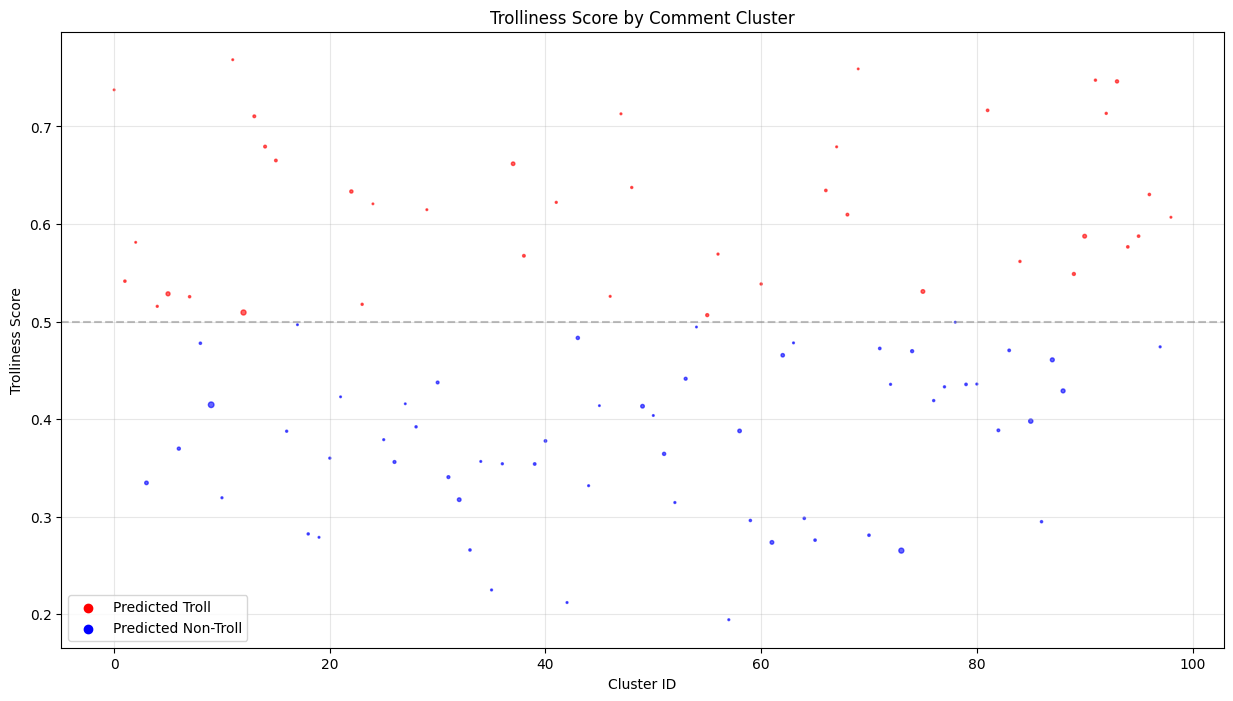


Clusters with highest trolliness scores:
Cluster 11 (trumpův musk): 0.768 trolliness score
Cluster 69 (dočkáme počkám): 0.759 trolliness score
Cluster 91 (remek děkuji): 0.748 trolliness score
Cluster 93 (jaký kdo): 0.746 trolliness score
Cluster 0 (dd odkaz): 0.738 trolliness score
Cluster 81 (zastáncem pokrok): 0.717 trolliness score
Cluster 92 (mlčet zklidněte): 0.713 trolliness score
Cluster 47 (liberale politikou): 0.713 trolliness score
Cluster 13 (trumpův republikáni): 0.710 trolliness score
Cluster 14 (americka proč): 0.679 trolliness score

Clusters with lowest trolliness scores:
Cluster 57 (motorové reaktor): 0.194 trolliness score
Cluster 42 (debyrokratizaci socialisticke): 0.212 trolliness score
Cluster 35 (světelných semaforové): 0.225 trolliness score
Cluster 73 (zeměkoule plochozemců): 0.265 trolliness score
Cluster 33 (ledové antarktidu): 0.266 trolliness score
Cluster 61 (měsíční planetky): 0.274 trolliness score
Cluster 65 (vesmírem kosmologie): 0.276 trolliness scor

In [9]:
# Group comments by cluster and run predictions
cluster_predictions = {}

# Skip cluster -1 (unlabelled)
for cluster_id in cluster_counts.index:
    if cluster_id == -1:
        continue
        
    # Get comments for this cluster
    cluster_comments = comment_topic_clusters[
        comment_topic_clusters['comment_cluster_id'] == cluster_id
    ]['content'].tolist()
    
    # Get cluster title
    cluster_title = comment_topic_clusters[
        comment_topic_clusters['comment_cluster_id'] == cluster_id
    ]['cluster_title'].iloc[0]
    
    # Run prediction
    pred_result = predictor.predict(cluster_comments)
    
    # Store results
    cluster_predictions[cluster_id] = {
        'title': cluster_title,
        'trolliness_score': pred_result['trolliness_score'],
        'binary_confidence': pred_result['binary_confidence'],
        'prediction': pred_result['prediction'],
        'num_comments': len(cluster_comments)
    }

# Create plot of trolliness scores by cluster
plt.figure(figsize=(15, 8))

# Extract data for plotting
cluster_ids = []
trolliness_scores = []
predictions = []
sizes = []
titles = []

for cluster_id, data in cluster_predictions.items():
    cluster_ids.append(cluster_id)
    trolliness_scores.append(data['trolliness_score'])
    predictions.append(data['prediction'] == 'troll')
    sizes.append(data['num_comments'])
    titles.append(data['title'])

# Create scatter plot
colors = ['red' if p else 'blue' for p in predictions]
plt.scatter(cluster_ids, trolliness_scores, c=colors, s=[s/10 for s in sizes], alpha=0.6)

plt.xlabel('Cluster ID')
plt.ylabel('Trolliness Score')
plt.title('Trolliness Score by Comment Cluster')

# Add legend
plt.scatter([], [], c='red', label='Predicted Troll')
plt.scatter([], [], c='blue', label='Predicted Non-Troll')
plt.legend()

# Add threshold line
plt.axhline(y=predictor.threshold, color='gray', linestyle='--', alpha=0.5)

# Add grid
plt.grid(True, alpha=0.3)

# Show plot
plt.show()

# Print statistics
print("\nClusters with highest trolliness scores:")
sorted_clusters = sorted(
    cluster_predictions.items(), 
    key=lambda x: x[1]['trolliness_score'], 
    reverse=True
)

for cluster_id, data in sorted_clusters[:10]:
    print(f"Cluster {cluster_id} ({data['title']}): {data['trolliness_score']:.3f} trolliness score")

print("\nClusters with lowest trolliness scores:")
sorted_clusters = sorted(
    cluster_predictions.items(),
    key=lambda x: x[1]['trolliness_score']
)

for cluster_id, data in sorted_clusters[:10]:
    print(f"Cluster {cluster_id} ({data['title']}): {data['trolliness_score']:.3f} trolliness score")


In [11]:
# Get user comment distributions across clusters
user_cluster_comments = {}
user_troll_scores = {}

# First collect comments per user per cluster
for idx, row in comments_df.iterrows():
    user = row['author']
    cluster = row['cluster_id']
    
    if user not in user_cluster_comments:
        user_cluster_comments[user] = {}
    
    if cluster not in user_cluster_comments[user]:
        user_cluster_comments[user][cluster] = 0
        
    user_cluster_comments[user][cluster] += 1

# Filter users with less than 10 comments
user_cluster_comments = {
    user: clusters for user, clusters in user_cluster_comments.items() 
    if sum(clusters.values()) >= 10
}

# Calculate troll score for each user based on cluster trolliness scores
for user, clusters in user_cluster_comments.items():
    total_comments = sum(clusters.values())
    troll_score = 0
    
    for cluster_id, count in clusters.items():
        if cluster_id in cluster_predictions:
            troll_score += (cluster_predictions[cluster_id]['trolliness_score'] * count)
    
    # Normalize by total comments
    if total_comments > 0:
        user_troll_scores[user] = troll_score / total_comments

# Get top and bottom users by troll score
print("\nUsers who post most in high-trolliness clusters:")
top_troll_users = sorted(user_troll_scores.items(), key=lambda x: x[1], reverse=True)[:10]
for user, score in top_troll_users:
    print(f"{user}: {score:.3f} average trolliness score")

print("\nUsers who post most in low-trolliness clusters:") 
bottom_troll_users = sorted(user_troll_scores.items(), key=lambda x: x[1])[:10]
for user, score in bottom_troll_users:
    print(f"{user}: {score:.3f} average trolliness score")



Users who post most in high-trolliness clusters:
Jiří Ovčáček: 0.713 average trolliness score
Lubomír Dvořák: 0.699 average trolliness score
Vladimír Hrabal: 0.565 average trolliness score
Jarda Zábranský: 0.565 average trolliness score
Jiří Sehnal: 0.560 average trolliness score
Jan Kyška: 0.549 average trolliness score
Marek Fráňa: 0.545 average trolliness score
Robert Kobra: 0.540 average trolliness score
Miroslava Halžová: 0.540 average trolliness score
Jindřich Hartman: 0.539 average trolliness score

Users who post most in low-trolliness clusters:
Lukáš Havlát: 0.000 average trolliness score
Havelka Zdeněk: 0.000 average trolliness score
Antonín Bartoš: 0.000 average trolliness score
Miloslav Pýcha: 0.000 average trolliness score
Robert Dvořák: 0.000 average trolliness score
Marie Škorpíková: 0.000 average trolliness score
Pavel Kalina: 0.000 average trolliness score
Zdeňka Špetová: 0.000 average trolliness score
Vladimir Nemec: 0.000 average trolliness score
Dita Kačmaříková: 0

In [23]:
# Get comments from top 3 troll users
print("\nSample comments from users with highest troll scores:")
for user, score in top_troll_users[:3]:
    print(f"\n{user} (troll score: {score:.3f}):")
    user_comments = comments_df[comments_df['author'] == user]['content'].values[:3]
    for comment in user_comments:
        print(f"- {comment}")

# Get comments from bottom 3 troll users        
print("\nSample comments from users with lowest troll scores:")
for user, score in bottom_troll_users[:3]:
    print(f"\n{user} (troll score: {score:.3f}):")
    user_comments = comments_df[comments_df['author'] == user]['content'].values[:3] 
    for comment in user_comments:
        print(f"- {comment}")



Sample comments from users with highest troll scores:

Jiri Šedivy (troll score: 0.997):
- Autor lže už v prvním odstavci.: "přestože po něčem takovém volá velení armády už roky. " Armáda po povinné vojně nevolala.
- Myslím, že agent PePa vůbec netuší, co říká Ale něco říkat musí.
- To je ten cimrmanovský logický úkrok. Nechceš bojovat za Ukrajinu, nejsi český vlastenec.

Jiří Ovčáček (troll score: 0.995):
- Také to tak řeším, jenže, když něco opravdu potřebuji... Přece nepojedu do Polska!
- Chyba! Ani ty "akční" nejsou reálné - cenově normální !!!
- Supermarkety vyrabovat a vypálit !!!

Václav Drahoňovský (troll score: 0.995):
- Jak můžou energie neustále zdražovat, když ČEZ v reklamách neustále zlevňuje??
- Ti Němci jsou úplně vypatlaní snad....co na to řít.
- Mělo by být uzákoněno, že: Uděláš zločin (těžšího rázu) a automaticky budeš deportován i s celou svou širokou rodinou.

Sample comments from users with lowest troll scores:

Josef Baron (troll score: 0.000):
- Myslím, že koumá